# **Character Level Language Models Playground**

In [186]:
# load dataset
words = open('names.txt', 'r').read().splitlines()

In [187]:
# dataset info
print(f"Word count: {len(words)}")
print(f"Shortest word length: {min([len(w) for w in words])}")
print(f"Longest word length: {max([len(w) for w in words])}")
print(f"Average word length: {round(sum([len(w) for w in words]) / len(words))}")

Word count: 32033
Shortest word length: 2
Longest word length: 15
Average word length: 6


## Bigram

Create bigrams of characters from input text and store them in dictionary with counts.

In [188]:
startToken = '<S>'
endToken = '<E>'

bigramsDict = {}
for w in words:
    chs = [startToken] + list(w) + [endToken] # add start and end tokens
    for ch1, ch2 in zip (chs, chs[1:]):
        bigram = (ch1, ch2)
        bigramsDict[bigram] = bigramsDict.get(bigram, 0) + 1

In [189]:
# 10 most common bigrams
sorted(bigramsDict.items(), key=lambda keyValue: keyValue[1], reverse=True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

To be more convinient we will keep bigrams in two dimensional array with first dimension being the first character and second dimension being the second character, and the value being how often the second character follows the first one.

In [190]:
import torch

In [191]:
# two dimensional tensor of bigram counts
numberOfChars = 28 # 26 letters + start and end tokens
biagramsCounts = torch.zeros((numberOfChars, numberOfChars), dtype=torch.int32)

In [192]:
# create lookup table for converting characters to indices
chars = sorted(list(set(''.join(words)))) # all unique characters in the dataset
stoi = {s:i for i,s in enumerate(chars)} # string to index

# manually enumerate start and end token since they are not visible in the dataset
stoi[startToken] = len(stoi)
stoi[endToken] = len(stoi)

# index to string
itos = {i:s for s,i in stoi.items()}

In [193]:
# for each word, count bigrams
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # add start and end tokens
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        biagramsCounts[ix1, ix2] += 1

### Visualize bigrams counts

(-0.5, 27.5, 27.5, -0.5)

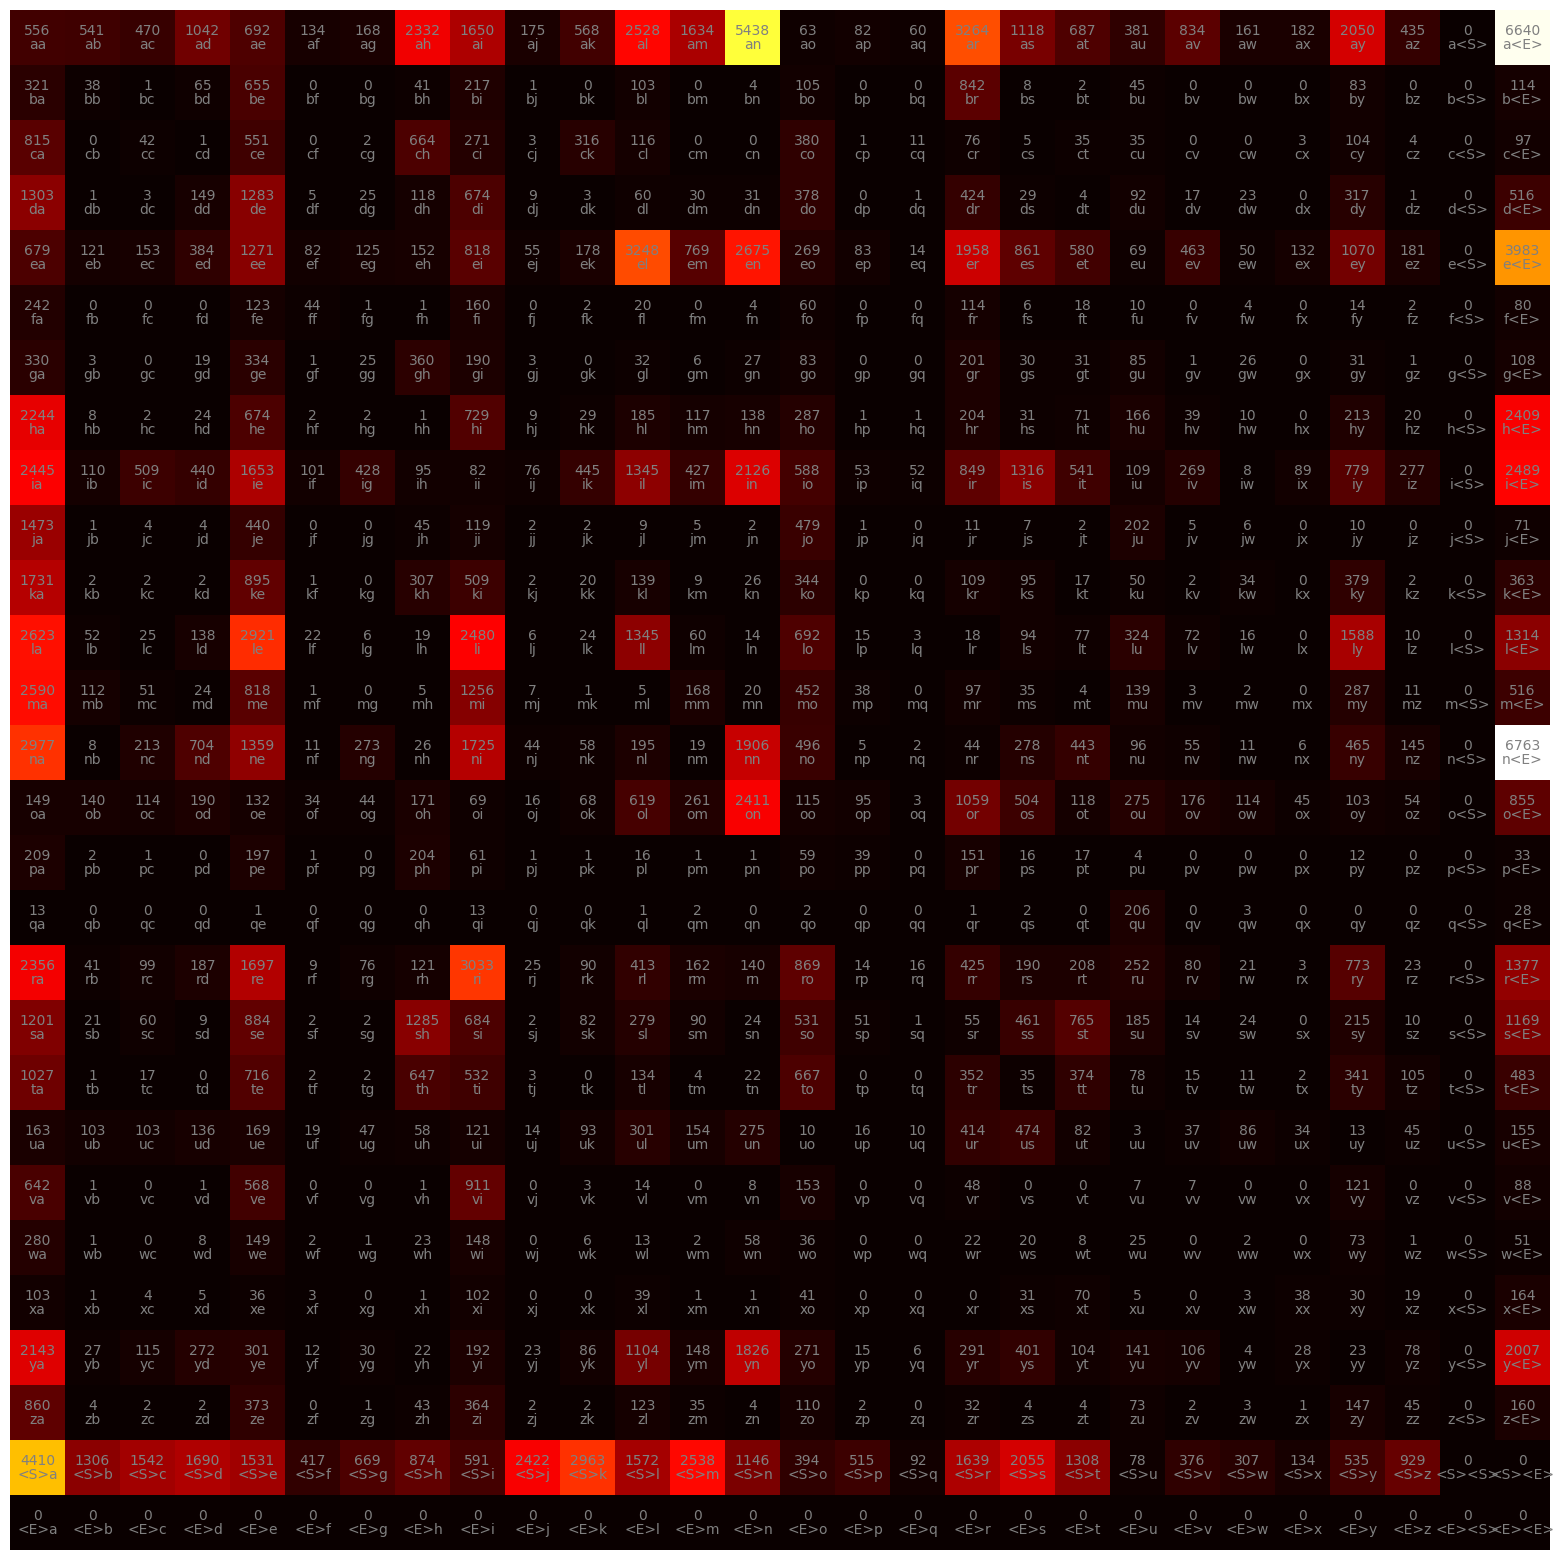

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(biagramsCounts, cmap='hot')
for i in range(numberOfChars):
    for j in range(numberOfChars):
        plt.text(j, i, itos[i] + itos[j], ha="center", va="top", color="gray")
        plt.text(j, i, biagramsCounts[i, j].item(), ha="center", va="bottom", color="gray")
plt.axis('off')

### Generating words based on bigrams and their probabilitiy distribution

In [211]:
generatedWords = []

for _ in range(20):
    generatedWord = ''
    rowIdx = stoi[startToken]
    
    while True:
        row = biagramsCounts[rowIdx].float()
        probabilityDistribution = row / row.sum()
        rowIdx = torch.multinomial(probabilityDistribution, num_samples=1, replacement=True).item()
        if rowIdx == stoi[endToken]:
            break
        generatedWord += itos[rowIdx]
        
    generatedWords.append(generatedWord)
    
generatedWords

['hay',
 'lilasa',
 'h',
 'ura',
 'jey',
 'pelenhalllayiestashallar',
 'ksh',
 'eeairaben',
 'delile',
 'y',
 'sushair',
 'co',
 'nieneelule',
 'ponin',
 'jhazan',
 'liariaqu',
 'az',
 'benn',
 'tai',
 'anrigumora']